## Travail pratique - 1 - IFT 3700


In [50]:
#!/usr/bin/env python
%matplotlib inline

# run pip install -U scikit-learn (if scikit-learn not installed)
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
# from pyclustering.cluster.kmedoids import kmedoids  # run pip install pyclustering
import matplotlib.pyplot as plt  # run python3 -m pip install -U matplotlib
import numpy as np
import csv
import math

# load data_train in data_train
with open('mnist_train.csv') as data_train:
    csv_file = csv.reader(data_train)

    data_points = []

    for row in csv_file:
        data_points.append(row)

    # pop out first line, the "labels" of our columns
    data_points.pop(0)

# load data_test in data_test
with open('mnist_test.csv') as data_test:
    csv_file = csv.reader(data_test)

    data_points_test = []

    for row in csv_file:
        data_points_test.append(row)

    # pop out first line, the "labels" of our columns
    data_points_test.pop(0)

# Load les labels dans labels[]
labels = []

for row in data_points: 
    labels.append(row[0])  # La colonne des labels

x_train = []

for row in data_points:
    x_train.append(row[1:785])


In [40]:
q_train = x_train[0:10000]
euclidean_train = euclidean_distances(q_train)
# print(len(x_train))
for i in range(len(euclidean_train[0])):
    print(euclidean_train[0][i])
# print(type(euclidean_train))

0.0
2387.111643807218
2773.149112471235
2554.8197588088283
2672.467212146858
2582.292392429641
2423.5917560513362
2169.9649766758907
2375.164625873331
2569.3078834581115
2139.8329374042264
2867.4593283950862
2666.0952721161334
2627.5760693079847
2377.237262033388
2627.911908721447
2452.252026199591
2305.5413680955717
2361.561771370802
2286.1800016621614
3153.737465294155
2661.511976302192
2430.517228904169
2562.744622470214
2413.886699909505
2731.21840942829
2490.662160952384
2388.085216234965
2841.7714545684353
2702.0340486381738
2590.299789599652
2627.523548895423
2393.2601195858338
2372.316378563365
2491.2386477413197
2608.1508775375705
2382.3291124443745
2612.5728697971276
2544.222867596312
2396.116232573036
2401.950041112429
2161.5577716082444
2387.229775283477
2143.5430949715005
2287.7751200675298
2617.665181034427
2534.771192829838
2496.3845857559686
2232.1556845345713
1917.8297630394623
2409.8062162754914
2944.956026836394
2649.1117379227326
2458.4550026388524
2598.585576809045

2938.5421555594535
2443.018419905998
2503.506341114398
2662.6332830489446
2511.3028491203527
2973.8011029656977
2433.9235813804835
2371.147823312583
1901.9116698732357
2727.6264406989458
2528.8426206468444
2677.132981381388
2852.881350494619
2864.1318056262703
3014.12043554998
2280.5194583690795
3003.29102818891
3226.773155956272
2002.0329667615367
2241.2848993378775
2487.6860734425477
3255.3038260660096
2945.956041763013
2902.8058839681307
3013.3403392248943
2478.60767367488
2313.819137270673
2915.482121365178
2168.4849549858536
2863.510782239173
2582.101082452041
2627.330584452592
2648.3039855726533
2771.0940077882597
2680.584824250111
2646.7274132407365
2344.815131305664
2391.783853110477
2810.644587990449
2807.4940783552865
2669.2349091078513
2405.6319336091296
2181.811632565928
2880.3897305746664
2738.3818214412686
2581.6787174239944
2546.461662778374
2753.4131546137423
2405.5837129478573
2449.76162105622
2605.140687179869
2254.418550314027
2536.243679144415
2809.2725036920147
285

2497.328172267313
2434.262927458741
2501.5017489500183
2523.522141769317
2327.418527038057
2434.1271536220124
2744.3651360560607
2383.747469846586
2514.9439357568194
2511.829014881387
2626.901216262233
2273.2745104804217
2638.0163001770857
2501.106555107159
2264.1203589915444
2421.3316584061754
2566.151983028285
2438.9015970309256
2395.7831704893497
2536.255507633251
2437.038161375402
2306.7483607884064
2424.1025143339134
2537.842784728794
2980.4957641305245
2342.124035998094
2846.895502121565
2439.2675130046723
2458.2837509124124
2396.177372399631
2622.861986456779
2117.4834119775296
2390.190996552368
2600.5032205325183
2535.885841279138
2449.767539992315
2563.7905530678595
2610.79757928492
2260.032521889895
2557.2891897476125
2242.825227252449
2401.9467104829782
2473.0994723221306
2619.976335770993
2434.3754845955873
2342.256817686737
2678.6168072346595
2148.1447809679867
2772.5264651577268
2216.2132117646083
2206.6857501692443
2287.869314449582
2795.674337257471
2199.448339925264
28

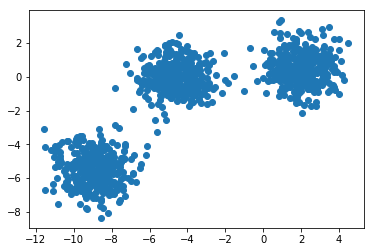

In [3]:
# DEMO 2 - TO DELETE 

n_samples = 1000
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

# on affiche nos données. 
# Comme premier argument on doit fournir les valeur en abcisse et comme deuxième argument les valeurs de l'ordonnée
plt.scatter(x=X[:, 0], y=X[:, 1])

In [53]:
q_train = x_train[0:1000]

for i in range(len(q_train)):
    for j in range(len(q_train[i])):
            q_train[i][j] = int(q_train[i][j])

q_train = np.array(q_train)

In [59]:
# Pour la notion de similarité, plusieurs choix existent (http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/)
# Comparer notre notion de similarité avec la distance euclidienne
# Faire un réduction de dimension
# TODO: Rapport
# Loader chaque vecteur dans une classe de 0..9

# Notion de similarité
# Comparaison entre les pixels de chaque image avec une autre
# Inspiration de la distance d'édition de Hamming
# Si les deux pixels sont simmilaires (i.e. les valeurs des deux pixels sont soit en haut ou en bas de 255/2),
# on considère qu'ils sont similaires, sinon (si une valeur est en haut de 255/2 et une autre en bas) on les
# considère différentes.
# Ensuite on construit une matrice de distance avec ces distances d'édition entre les différentes images.
# 2, 4, 8, 16, 32, 64, 128, 256 
# [0, 64] -> D = D + 0
# [65, 128] -> D = D + 0.33
# [128, 196] -> D = D + 0.67
# [196, 256] -> D = D + 1

edition_train = np.array([])
for i in range(len(q_train)):
    row = np.array([])
    for j in range(len(q_train)):
        row_x = np.array(q_train[i])
        row_y = np.array(q_train[j])
        total_dist = 0
        for k in range(len(row_x)):
            dist = abs(row_x[k] - row_y[k])
            if dist <= 64:
                total_dist += 0
            elif dist <= 128:
                total_dist += 0.33
            elif dist <= 196:
                total_dist += 0.67
            else:
                total_dist += 1
        row = np.append(row, total_dist)
    edition_train = np.append(edition_train, row)

print(edition_train[0])

0.0


**k-metoïde**

**Partition Binaire**

**PCoA**

**IsoMap**

**KNN**